<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>🧪 Lab - Cell Phone Churning</b></h1>
  </div>
</div>

# PART 1: Data Cleaning

Before diving into the modeling process, it's crucial to ensure that your data is clean and ready for analysis.

- **Check null values:** Examine the dataset for any missing values. Addressing null values is essential to prevent issues during model training and evaluation.

- **Check dtypes:** Ensure that the data types of your features are appropriate. This step is important for avoiding potential discrepancies between the expected and actual data types.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
df = pd.read_csv('/gdrive/MyDrive/Coding Temple/8 - Machine Learning Classification/Coding-Temple-M8-Lab-Cell-Phone-Churning/data/churn.csv')
df.head()

account_length  vmail_message  day_mins  day_calls  day_charge  eve_mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   
2             137              0     243.4        114       41.38     121.2   
3              84              0     299.4         71       50.90      61.9   
4              75              0     166.7        113       28.34     148.3   

   eve_calls  eve_charge  night_mins  night_calls  night_charge  intl_mins  \
0         99       16.78       244.7           91         11.01       10.0   
1        103       16.62       254.4          103         11.45       13.7   
2        110       10.30       162.6          104          7.32       12.2   
3         88        5.26       196.9           89          8.86        6.6   
4        122       12.61       186.9          121          8.41       10.1   

   intl_calls  intl_charge  custserv_calls  churn  
0           3         2.70               1  False  
1           3         3.70               1  False  
2           5         3.29               0  False  
3           7         1.78               2  False  
4           3         2.73               3  False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_length  3333 non-null   int64  
 1   vmail_message   3333 non-null   int64  
 2   day_mins        3333 non-null   float64
 3   day_calls       3333 non-null   int64  
 4   day_charge      3333 non-null   float64
 5   eve_mins        3333 non-null   float64
 6   eve_calls       3333 non-null   int64  
 7   eve_charge      3333 non-null   float64
 8   night_mins      3333 non-null   float64
 9   night_calls     3333 non-null   int64  
 10  night_charge    3333 non-null   float64
 11  intl_mins       3333 non-null   float64
 12  intl_calls      3333 non-null   int64  
 13  intl_charge     3333 non-null   float64
 14  custserv_calls  3333 non-null   int64  
 15  churn           3333 non-null   bool   
dtypes: bool(1), float64(8), int64(7)
memory usage: 394.0 KB


Map `churn` column from True/False to $1/0$.

In [5]:
df['churn'] = df['churn'].map({True: 1, False: 0})

In [6]:
df.head()

account_length  vmail_message  day_mins  day_calls  day_charge  eve_mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   
2             137              0     243.4        114       41.38     121.2   
3              84              0     299.4         71       50.90      61.9   
4              75              0     166.7        113       28.34     148.3   

   eve_calls  eve_charge  night_mins  night_calls  night_charge  intl_mins  \
0         99       16.78       244.7           91         11.01       10.0   
1        103       16.62       254.4          103         11.45       13.7   
2        110       10.30       162.6          104          7.32       12.2   
3         88        5.26       196.9           89          8.86        6.6   
4        122       12.61       186.9          121          8.41       10.1   

   intl_calls  intl_charge  custserv_calls  churn  
0           3         2.70               1      0  
1           3         3.70               1      0  
2           5         3.29               0      0  
3           7         1.78               2      0  
4           3         2.73               3      0

# PART 2: EDA

Exploring your data helps you gain insights and identify patterns or trends. Consider the following steps:

- **Visualize the data:** Utilize seaborn's `pairplot` to create a visual representation of relationships between different variables. This can offer a preliminary understanding of how features correlate with each other.
- Feel free to create other visualizations as well!

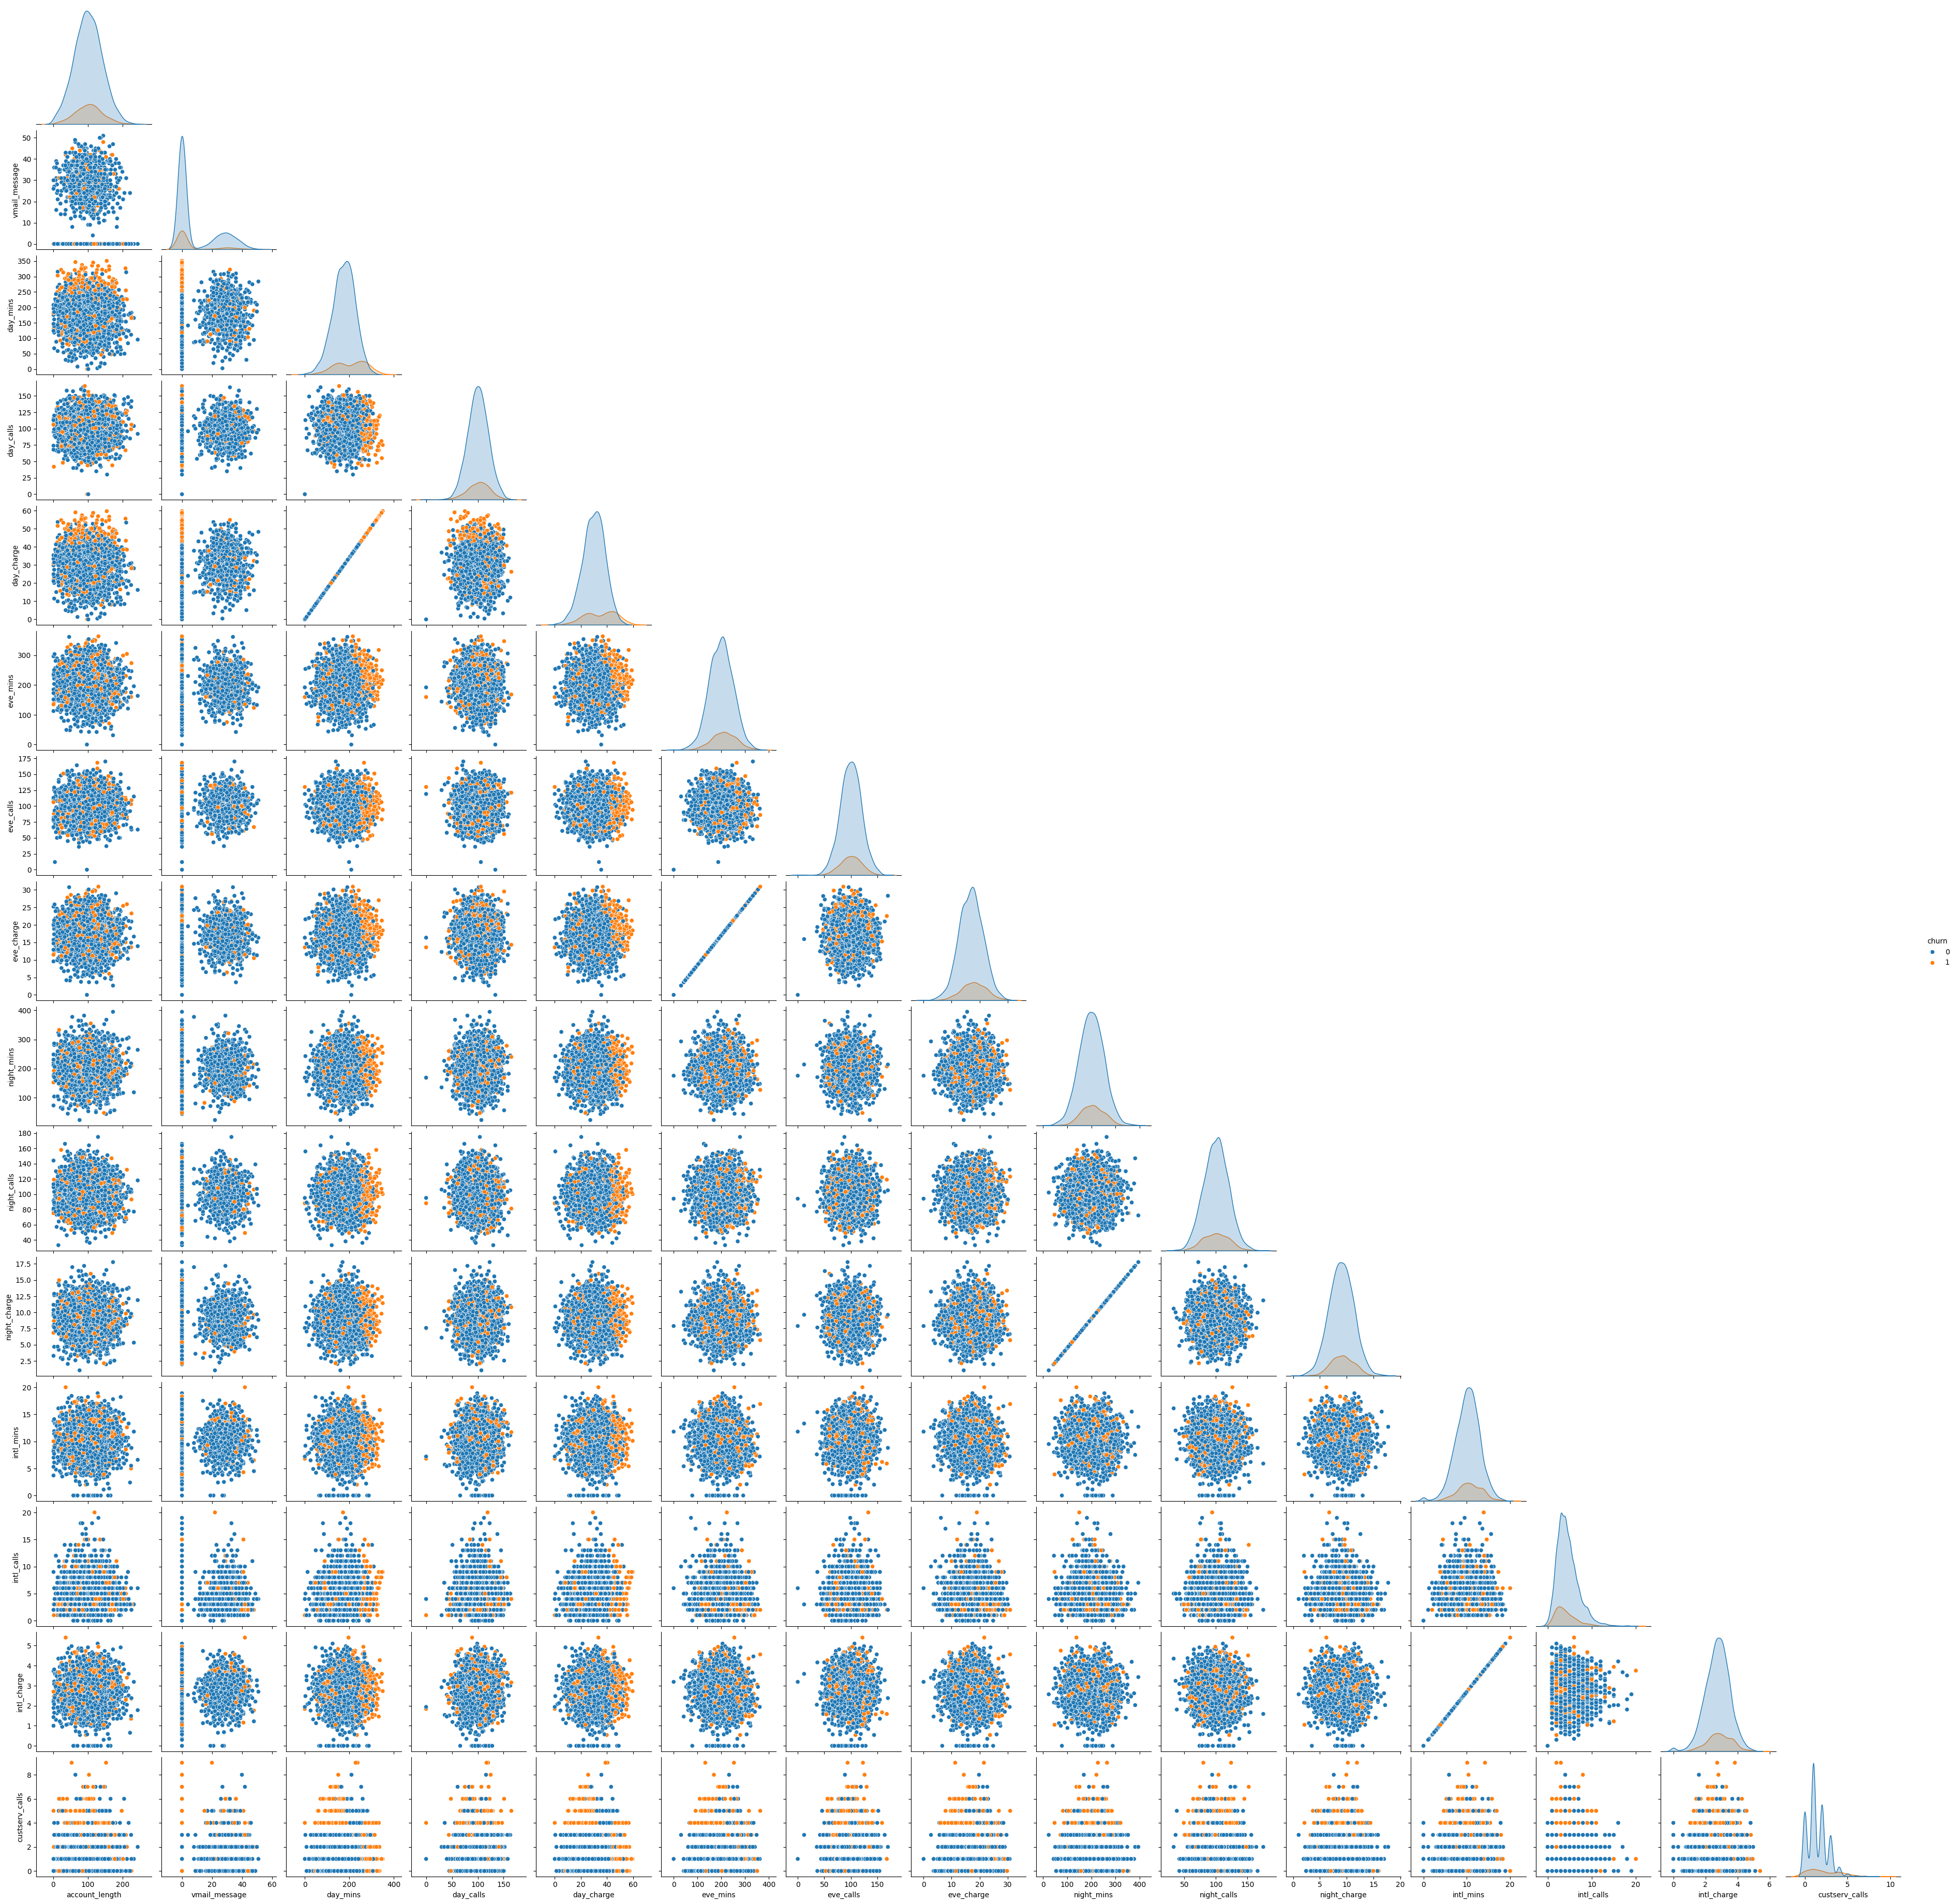

In [7]:
# This code cell take about 2-3 minutes to execute.
sns.pairplot(df, hue='churn', corner=True)
plt.show()

#### How do the features in the dataset correlate with `churn`?

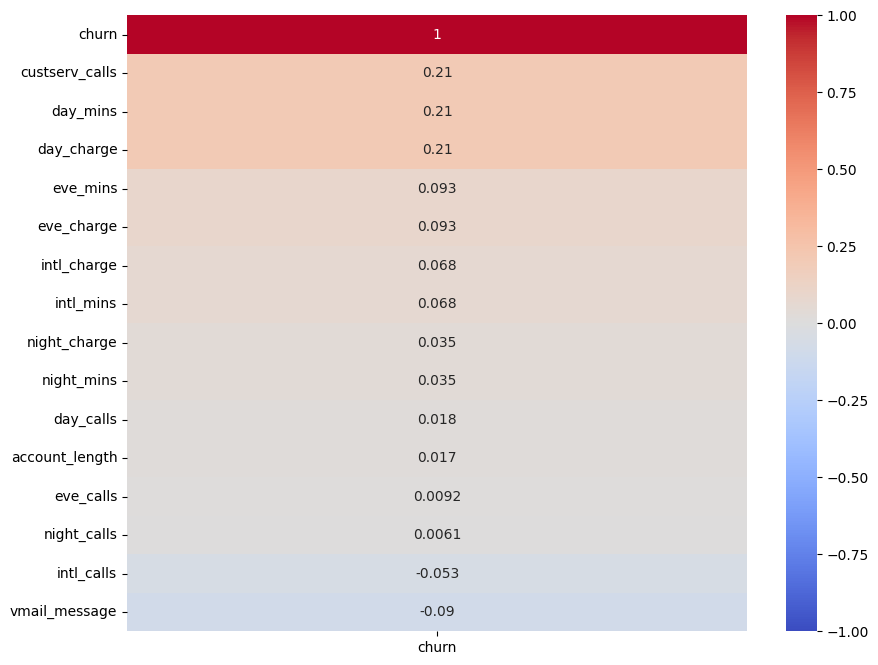

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only=True)[['churn']].sort_values(by='churn', ascending = False), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);

# PART 3: MODELING
Now that your data is clean and you've explored its characteristics, it's time to build and evaluate your models.

- **Establish baseline accuracy score:** Before training any models, establish a baseline accuracy score. This provides a benchmark for evaluating the performance of your models.

- **Train-test-split with `random_state = 42`:** Split your data into training and testing sets using `train_test_split` with a specified random state. This ensures reproducibility in your results.

- **Normalize your data with `StandardScaler`:** Standardize your features using `StandardScaler` to ensure that they are on a similar scale. This step is particularly important for algorithms sensitive to the scale of input features, such as K-Nearest Neighbors.

- **Evaluate K-Nearest Neighbors (KNN):**
  - Set \( k = 5 \) and calculate the training/testing accuracy scores. Explore whether the model performs better with other values of \( k \). <br>
<br>
- **Try Logistic Regression and RandomForestClassifier:**
  - Experiment with alternative models such as Logistic Regression and RandomForestClassifier. Compare their performance against the KNN model to identify the most suitable algorithm for your specific classification task.
<br>
  - For each model, include a confusion matrix to assess its performance in terms of true positives, true negatives, false positives, and false negatives.

#### Let's establish the Baseline

In [9]:
df['churn'].value_counts(normalize = True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

We want a model that will have a better accuracy score than 85.5%!

#### Determine the $X$ and $y$ datasets

In [10]:
X = df.drop(columns = 'churn')
y = df['churn']

#### Establish train and test datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

#### Normalize the data using `StandardScaler()`

In [12]:
sc = StandardScaler()

X_train_sc= sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### Instantiate KNN, then fit and evaluate the model.

In [13]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [14]:
knn.score(X_train_sc, y_train)

0.9155662264905963

In [15]:
knn.score(X_test_sc, y_test)

0.8836930455635491

The model does do better than the baseline, but not by much.  Let's create a confusion matrix.

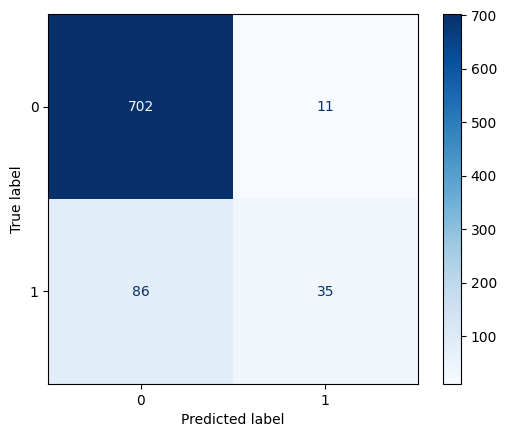

In [16]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap='Blues');

#### Let's try different values of $k$ to see how the model behaves...

In [17]:
# Create empty list for scores
scores = []

for k in range(3, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})
df_scores = pd.DataFrame(scores)
df_scores

k  train_score  test_score
0    3     0.934774    0.872902
1    5     0.915566    0.883693
2    7     0.908363    0.888489
3    9     0.901961    0.886091
4   11     0.893157    0.878897
5   13     0.893157    0.883693
6   15     0.888756    0.884892
7   17     0.886355    0.881295
8   19     0.885554    0.881295
9   21     0.882353    0.880096
10  23     0.879552    0.878897
11  25     0.877551    0.877698
12  27     0.875950    0.876499
13  29     0.873149    0.875300

#### Visualize this:

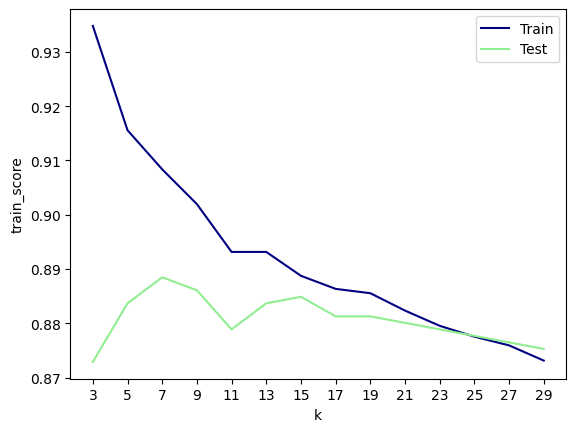

In [18]:

sns.lineplot(data = df_scores, x = 'k', y = 'train_score', c='navy', label='Train');
sns.lineplot(data = df_scores, x = 'k', y = 'test_score', c ='lightgreen', label='Test');
plt.xticks(np.arange(3, 31, 2));

## Now we'll try Logistic Regression.


In [19]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [20]:
logr.score(X_train_sc, y_train)

0.8599439775910365

In [21]:
logr.score(X_test_sc, y_test)

0.8561151079136691

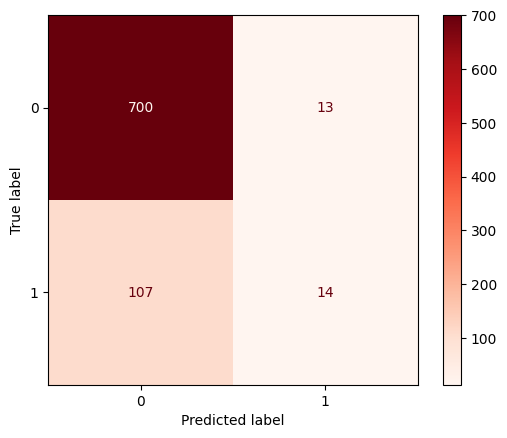

In [22]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');

It looks like logistic regression doesn't do any better than the baseline.

## Let's try `RandomForest()`

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [24]:
rf.score(X_train_sc, y_train)

1.0

In [25]:
rf.score(X_test_sc, y_test)

0.919664268585132

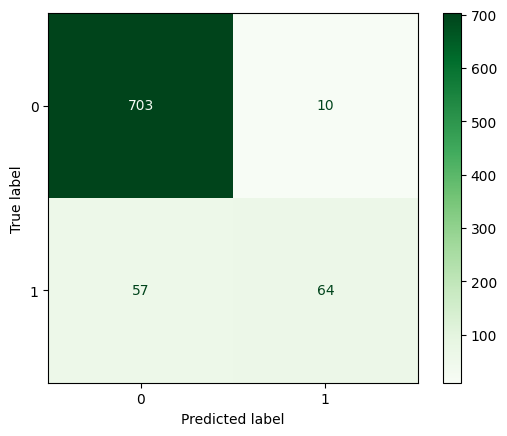

In [26]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Greens');

With out any model tweaking, it looks like Random Forest is the best model choice.